In [1]:
from preprocess.preprocess import load_dataset, compute_label_agg, select_data, get_data_loaders, undersample

import torch
import torch.nn as nn
import torch.optim as optim

from models.CNN import *
from utils.trainer import trainer
from utils.RNN_utils import plot_losses, rename_with_acc

d:\SUTD\T6\DL Project\Deep_Learning_ECGclassification\utils\RNN_utils.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Define device for torch
use_cuda = True
device = torch.device("cuda" if (
    use_cuda and torch.cuda.is_available()) else "cpu")
print(device)

cuda


# Define options


In [3]:
EPOCH = 20
LOAD_DATASET = False
TRAIN_PATH = './PTB_train.pt'
VALID_PATH = './PTB_valid.pt'
TEST_PATH = './PTB_test.pt'
SAVE_DIR = './CNN_model_saves/'
BATCH_SIZE = 256

# Loading the main dataset


In [4]:
if LOAD_DATASET:
    train_loader = torch.load(TRAIN_PATH)
    valid_loader = torch.load(VALID_PATH)
    test_loader = torch.load(TEST_PATH)
else:
    path = './data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'

    data, raw_labels = load_dataset(path)

    labels = compute_label_agg(raw_labels, path)

    data, labels, y = select_data(data, labels)

    data, labels, y = undersample(data, labels, y)

    train_loader, valid_loader, test_loader = get_data_loaders(
        data, labels, y, BATCH_SIZE)

    # torch.save(train_loader, TRAIN_PATH)
    # torch.save(valid_loader, VALID_PATH)
    # torch.save(test_loader, TEST_PATH)

# Loading the augmented data loaders

In [5]:
# train_loader_rn = torch.load('./trainloader_augmented_rn.pt')
# valid_loader_rn = torch.load('./validloader_augmented_rn.pt')
# test_loader_rm = torch.load('./testloader_augmented_rm.pt')

train_loader_rn = torch.load('./trainloader_augmented_rn.pt')
valid_loader_rn = torch.load('./validloader_augmented_rn.pt')
test_loader_rn = torch.load('./testloader_augmented_rn.pt')

# Combining the undersampled dataset with the Random Noising augmented dataset

In [6]:
combined_train_rn_ds = torch.utils.data.ConcatDataset([train_loader.dataset, train_loader_rn.dataset])
combined_valid_rn_ds = torch.utils.data.ConcatDataset([valid_loader.dataset, valid_loader_rn.dataset])
combined_test_rn_ds = torch.utils.data.ConcatDataset([test_loader.dataset, test_loader_rn.dataset])

combined_rn_train_loader = torch.utils.data.DataLoader(combined_train_rn_ds, batch_size=BATCH_SIZE, shuffle=True)
combined_rn_valid_loader = torch.utils.data.DataLoader(combined_valid_rn_ds, batch_size=BATCH_SIZE)
combined_rn_test_loader = torch.utils.data.DataLoader(combined_test_rn_ds, batch_size=BATCH_SIZE)

# Training the model


In [7]:
SAVE_NAME =  f'CNN_undersampled_augmented_rn_epoch_{EPOCH}'

model = CNN().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, combined_rn_train_loader, combined_rn_test_loader, combined_rn_valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/20], Step [10/63], Train Loss: 0.6073
Epoch [1/20], Train Accuracy: 0.3156
Epoch [1/20], Validation Accuracy: 0.3313, Validation Loss: 0.6046
Model saved to ==> ./CNN_model_saves/model_CNN_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [20/63], Train Loss: 0.5845
Epoch [1/20], Train Accuracy: 0.3215
Epoch [1/20], Validation Accuracy: 0.3409, Validation Loss: 0.5945
Model saved to ==> ./CNN_model_saves/model_CNN_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [30/63], Train Loss: 0.5764
Epoch [1/20], Train Accuracy: 0.3388
Epoch [1/20], Validation Accuracy: 0.4111, Validation Loss: 0.5775
Model saved to ==> ./CNN_model_saves/model_CNN_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [40/63], Train Loss: 0.5557
Epoch [1/20], Train Accuracy: 0.3585
Epoch [1/20], Validation Accuracy: 0.3715, Validation Loss: 0.5708
Model saved to ==> ./CNN_model_saves/model_CNN_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [50/63], Train Loss: 0.5734
Epoc

# Evaluate and plot losses


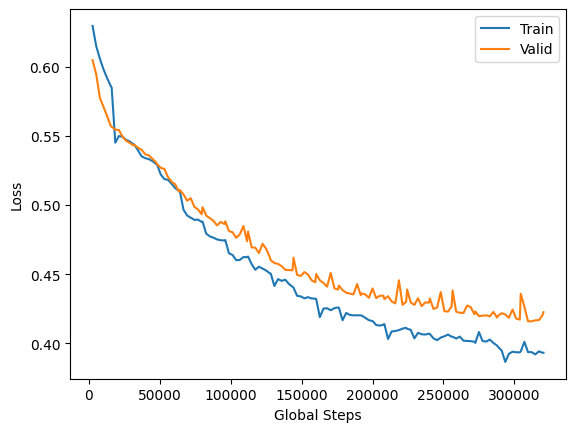

In [8]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)

# Training the model


In [9]:
SAVE_NAME =  f'MMCNN_CAT_undersampled_augmented_rn_epoch_{EPOCH}'

model = MMCNN_CAT().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, combined_rn_train_loader, combined_rn_test_loader, combined_rn_valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/20], Step [10/63], Train Loss: 0.5812
Epoch [1/20], Train Accuracy: 0.4371
Epoch [1/20], Validation Accuracy: 0.5517, Validation Loss: 0.5816
Model saved to ==> ./CNN_model_saves/model_MMCNN_CAT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [20/63], Train Loss: 0.5406
Epoch [1/20], Train Accuracy: 0.5182
Epoch [1/20], Validation Accuracy: 0.5387, Validation Loss: 0.5491
Model saved to ==> ./CNN_model_saves/model_MMCNN_CAT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [30/63], Train Loss: 0.5052
Epoch [1/20], Train Accuracy: 0.5551
Epoch [1/20], Validation Accuracy: 0.6355, Validation Loss: 0.5199
Model saved to ==> ./CNN_model_saves/model_MMCNN_CAT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [40/63], Train Loss: 0.5142
Epoch [1/20], Train Accuracy: 0.5756
Epoch [1/20], Validation Accuracy: 0.6381, Validation Loss: 0.5023
Model saved to ==> ./CNN_model_saves/model_MMCNN_CAT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [50/63],

# Evaluate and plot losses


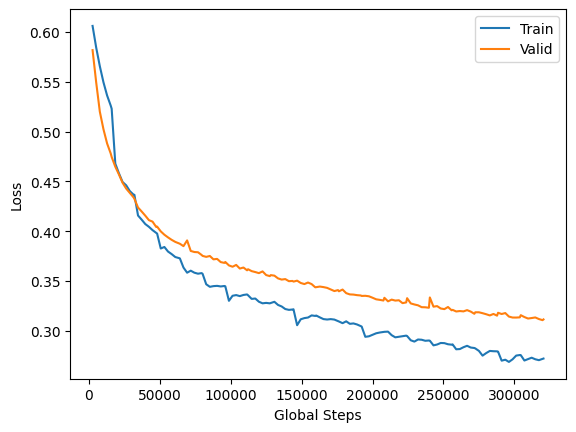

In [10]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)

# Training the model


In [11]:
SAVE_NAME =  f'MMCNN_ATT_undersampled_augmented_rn_epoch_{EPOCH}'

model = MMCNN_ATT().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, combined_rn_train_loader, combined_rn_test_loader, combined_rn_valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/20], Step [10/63], Train Loss: 0.6028
Epoch [1/20], Train Accuracy: 0.3312
Epoch [1/20], Validation Accuracy: 0.3439, Validation Loss: 0.5973
Model saved to ==> ./CNN_model_saves/model_MMCNN_ATT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [20/63], Train Loss: 0.5840
Epoch [1/20], Train Accuracy: 0.3488
Epoch [1/20], Validation Accuracy: 0.4222, Validation Loss: 0.5721
Model saved to ==> ./CNN_model_saves/model_MMCNN_ATT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [30/63], Train Loss: 0.5629
Epoch [1/20], Train Accuracy: 0.3745
Epoch [1/20], Validation Accuracy: 0.4212, Validation Loss: 0.5739
Epoch [1/20], Step [40/63], Train Loss: 0.5455
Epoch [1/20], Train Accuracy: 0.3957
Epoch [1/20], Validation Accuracy: 0.4408, Validation Loss: 0.5612
Model saved to ==> ./CNN_model_saves/model_MMCNN_ATT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [50/63], Train Loss: 0.5417
Epoch [1/20], Train Accuracy: 0.4121
Epoch [1/20], Validation Accuracy:

# Evaluate and plot losses


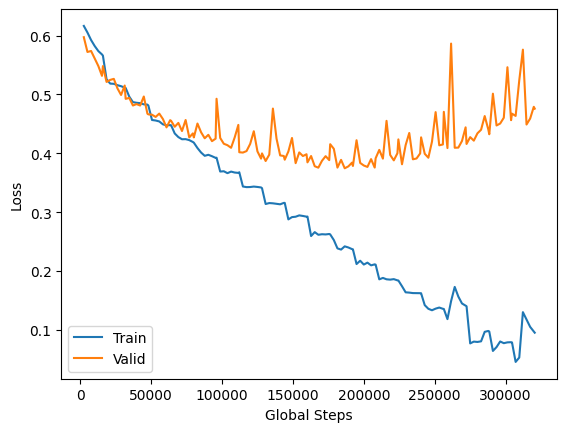

In [12]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)

# Training the model


In [13]:
SAVE_NAME =  f'MMCNN_SUM_Dropout_batchnorn_undersampled_augmented_rn_epoch_{EPOCH}'

model = MMCNN_SUM().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, combined_rn_train_loader, combined_rn_test_loader, combined_rn_valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/20], Step [10/63], Train Loss: 0.5744
Epoch [1/20], Train Accuracy: 0.4379
Epoch [1/20], Validation Accuracy: 0.5020, Validation Loss: 0.5791
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_Dropout_batchnorn_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [20/63], Train Loss: 0.4683
Epoch [1/20], Train Accuracy: 0.5566
Epoch [1/20], Validation Accuracy: 0.6842, Validation Loss: 0.4666
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_Dropout_batchnorn_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [30/63], Train Loss: 0.4177
Epoch [1/20], Train Accuracy: 0.6163
Epoch [1/20], Validation Accuracy: 0.7380, Validation Loss: 0.4298
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_Dropout_batchnorn_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [40/63], Train Loss: 0.3948
Epoch [1/20], Train Accuracy: 0.6587
Epoch [1/20], Validation Accuracy: 0.7445, Validation Loss: 0.4275
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_Dropout_bat

# Evaluate and plot losses


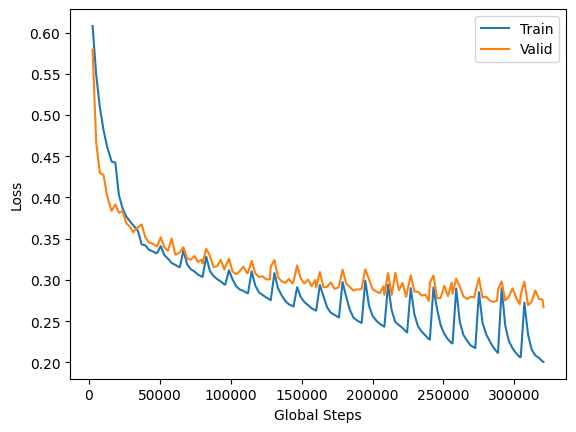

In [14]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)

# Training the model


In [15]:
SAVE_NAME =  f'MMCNN_SUM_ATT_undersampled_augmented_rn_epoch_{EPOCH}'

model = MMCNN_SUM_ATT().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, combined_rn_train_loader, combined_rn_test_loader, combined_rn_valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/20], Step [10/63], Train Loss: 0.5002
Epoch [1/20], Train Accuracy: 0.5055
Epoch [1/20], Validation Accuracy: 0.5191, Validation Loss: 0.5155
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_ATT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [20/63], Train Loss: 0.4585
Epoch [1/20], Train Accuracy: 0.5902
Epoch [1/20], Validation Accuracy: 0.7003, Validation Loss: 0.4611
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_ATT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [30/63], Train Loss: 0.4061
Epoch [1/20], Train Accuracy: 0.6410
Epoch [1/20], Validation Accuracy: 0.7048, Validation Loss: 0.4216
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_ATT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20], Step [40/63], Train Loss: 0.3457
Epoch [1/20], Train Accuracy: 0.6715
Epoch [1/20], Validation Accuracy: 0.7329, Validation Loss: 0.4018
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_ATT_undersampled_augmented_rn_epoch_20.pt
Epoch [1/20

# Evaluate and plot losses


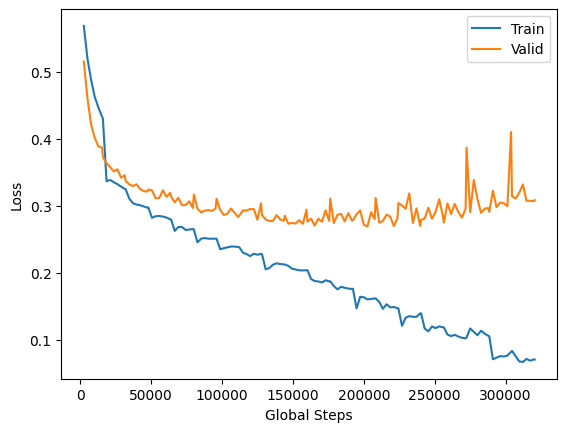

In [16]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)